<a href="https://colab.research.google.com/github/Zenologos/Data-Analysis/blob/master/YouTube_Viral_Videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
mydf = pd.read_csv('USvideos.csv')


In [ ]:
mydf.sort_values(['title','trending_date'], ascending=[False,False]).head(20)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
16450,r3J784MSRyQ,18.06.02,"😱 $1,145 iPhone Case!!",iJustine,28,2018-02-02T23:33:00.000Z,"ijustine|""gray international""|""most expensive ...",734863,19965,4110,3553,https://i.ytimg.com/vi/r3J784MSRyQ/default.jpg,False,False,False,What do you guys thing of this iPhone Case?!\n...
16219,r3J784MSRyQ,18.05.02,"😱 $1,145 iPhone Case!!",iJustine,28,2018-02-02T23:33:00.000Z,"ijustine|""gray international""|""most expensive ...",673040,18904,3852,3639,https://i.ytimg.com/vi/r3J784MSRyQ/default.jpg,False,False,False,What do you guys thing of this iPhone Case?!\n...
15991,r3J784MSRyQ,18.04.02,"😱 $1,145 iPhone Case!!",iJustine,28,2018-02-02T23:33:00.000Z,"ijustine|""gray international""|""most expensive ...",408713,15040,2038,2617,https://i.ytimg.com/vi/r3J784MSRyQ/default.jpg,False,False,False,What do you guys thing of this iPhone Case?!\n...
3188,bAfn2duIlN8,17.29.11,🎃 How to make Pumpkin Pie Mistakes,iJustine,22,2017-11-21T19:39:43.000Z,"ijustine|""how to make pumpkin pie""|""pumpkin pi...",193223,8141,302,1226,https://i.ytimg.com/vi/bAfn2duIlN8/default.jpg,False,False,False,Making pumpkin pie.. or at least trying my bes...
2944,bAfn2duIlN8,17.28.11,🎃 How to make Pumpkin Pie Mistakes,iJustine,22,2017-11-21T19:39:43.000Z,"ijustine|""how to make pumpkin pie""|""pumpkin pi...",186407,8034,301,1211,https://i.ytimg.com/vi/bAfn2duIlN8/default.jpg,False,False,False,Making pumpkin pie.. or at least trying my bes...
2709,bAfn2duIlN8,17.27.11,🎃 How to make Pumpkin Pie Mistakes,iJustine,22,2017-11-21T19:39:43.000Z,"ijustine|""how to make pumpkin pie""|""pumpkin pi...",178072,7822,299,1208,https://i.ytimg.com/vi/bAfn2duIlN8/default.jpg,False,False,False,Making pumpkin pie.. or at least trying my bes...
2492,bAfn2duIlN8,17.26.11,🎃 How to make Pumpkin Pie Mistakes,iJustine,22,2017-11-21T19:39:43.000Z,"ijustine|""how to make pumpkin pie""|""pumpkin pi...",168384,7596,291,1111,https://i.ytimg.com/vi/bAfn2duIlN8/default.jpg,False,False,False,Making pumpkin pie.. or at least trying my bes...
2277,bAfn2duIlN8,17.25.11,🎃 How to make Pumpkin Pie Mistakes,iJustine,22,2017-11-21T19:39:43.000Z,"ijustine|""how to make pumpkin pie""|""pumpkin pi...",155869,7268,277,1098,https://i.ytimg.com/vi/bAfn2duIlN8/default.jpg,False,False,False,Making pumpkin pie.. or at least trying my bes...
2069,bAfn2duIlN8,17.24.11,🎃 How to make Pumpkin Pie Mistakes,iJustine,22,2017-11-21T19:39:43.000Z,"ijustine|""how to make pumpkin pie""|""pumpkin pi...",142155,6971,268,1003,https://i.ytimg.com/vi/bAfn2duIlN8/default.jpg,False,False,False,Making pumpkin pie.. or at least trying my bes...
1866,bAfn2duIlN8,17.23.11,🎃 How to make Pumpkin Pie Mistakes,iJustine,22,2017-11-21T19:39:43.000Z,"ijustine|""how to make pumpkin pie""|""pumpkin pi...",126015,6562,253,925,https://i.ytimg.com/vi/bAfn2duIlN8/default.jpg,False,False,False,Making pumpkin pie.. or at least trying my bes...


In [ ]:
mydf.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [ ]:
mydf.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [ ]:
mydf['trending_date']=pd.to_datetime(mydf['trending_date'], format='%y.%d.%m')
mydf['trending_date'].head()

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [ ]:
mydf['publish_time']=pd.to_datetime(mydf['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
mydf['publish_time'].head()

0   2017-11-13 17:13:01
1   2017-11-13 07:30:00
2   2017-11-12 19:05:24
3   2017-11-13 11:00:04
4   2017-11-12 18:01:41
Name: publish_time, dtype: datetime64[ns]

In [ ]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   publish_time            40949 non-null  datetime64[ns]
 6   tags                    40949 non-null  object        
 7   views                   40949 non-null  int64         
 8   likes                   40949 non-null  int64         
 9   dislikes                40949 non-null  int64         
 10  comment_count           40949 non-null  int64         
 11  thumbnail_link          40949 non-null  object        
 12  comments_disabled       40949 non-null  bool  

In [ ]:
print(mydf.shape)

tdf = mydf[~mydf.duplicated(['title'], keep='last')]
df = pd.DataFrame(tdf)
print(df.shape)
df.index.duplicated().any()
df.info()
df.head(20)


(40949, 16)
(6455, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6455 entries, 10 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                6455 non-null   object        
 1   trending_date           6455 non-null   datetime64[ns]
 2   title                   6455 non-null   object        
 3   channel_title           6455 non-null   object        
 4   category_id             6455 non-null   int64         
 5   publish_time            6455 non-null   datetime64[ns]
 6   tags                    6455 non-null   object        
 7   views                   6455 non-null   int64         
 8   likes                   6455 non-null   int64         
 9   dislikes                6455 non-null   int64         
 10  comment_count           6455 non-null   int64         
 11  thumbnail_link          6455 non-null   object        
 12  comments_disabled      

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12 21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...
44,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...
46,ogYum4kWXgk,2017-11-14,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13 13:00:06,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...
55,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,2017-11-10 19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
76,IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28,2017-11-10 12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...
78,cOc3tsFWoRs,2017-11-14,Jason Momoa & Lisa Bonet: Love at First Sight,The Late Late Show with James Corden,24,2017-11-10 09:35:00,"James Corden|""The Late Late Show""|""Colbert""|""l...",1497519,15504,353,1084,https://i.ytimg.com/vi/cOc3tsFWoRs/default.jpg,False,False,False,James congratulates Jason Momoa on recently ma...
102,wnwF1FHybDQ,2017-11-14,Mark Wahlberg's Kids Use Him for His Celeb Con...,Late Night with Seth Meyers,23,2017-11-10 11:00:04,"Late Night|""Seth Meyers""|""Mark Wahlberg""|""Kids...",225286,1731,193,206,https://i.ytimg.com/vi/wnwF1FHybDQ/default.jpg,False,False,False,Mark Wahlberg tells Seth how his kids want not...
104,pz95u3UVpaM,2017-11-14,Camila Cabello - Havana (Vertical Video) ft. Y...,CamilaCabelloVEVO,10,2017-11-10 05:01:00,"camila cabello|""camila""|""young thug""|""havana""|...",5476737,286268,4083,12254,https://i.ytimg.com/vi/pz95u3UVpaM/default.jpg,False,False,False,Havana – Spotify Vertical Video \nVideo Direct...


In [ ]:
df.insert(4, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df[['publish_date', 'publish_time']].head()

,publish_date,publish_time
10,2017-11-13,02:05:26
36,2017-11-12,18:00:03
41,2017-11-12,21:16:40
44,2017-11-11,15:00:03
46,2017-11-13,13:00:06


In [ ]:
df['publish_date']=pd.to_datetime(df['publish_date'])

In [ ]:
df['trend'] = df['trending_date'] - df['publish_date']
df['trend'] = df['trend'].dt.days.astype('int16') # converting number of trending days into integer for arithmetic calculations
df['trend'].head()

10    1
36    2
41    2
44    3
46    1
Name: trend, dtype: int16

In [ ]:
Mask1=df['views'] > 5000000
Mask2= df['trend'].between(3,7)
df['viral']=Mask1&Mask2
df['viral'].head()
df['viral'].value_counts()

False    6322
True      133
Name: viral, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6455 entries, 10 to 40948
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                6455 non-null   object        
 1   trending_date           6455 non-null   datetime64[ns]
 2   title                   6455 non-null   object        
 3   channel_title           6455 non-null   object        
 4   publish_date            6455 non-null   datetime64[ns]
 5   category_id             6455 non-null   int64         
 6   publish_time            6455 non-null   object        
 7   tags                    6455 non-null   object        
 8   views                   6455 non-null   int64         
 9   likes                   6455 non-null   int64         
 10  dislikes                6455 non-null   int64         
 11  comment_count           6455 non-null   int64         
 12  thumbnail_link          6455 non-null   object

In [ ]:
type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    df[column] = df[column].astype(int)

In [ ]:
type_str_list = ['category_id']
for column in type_str_list:
    df[column] = df[column].astype(str)

In [ ]:
import json
id_to_category = {}
with open('US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']
id_to_category
#Inserting to Category Name
df.insert(4, 'category', df['category_id'].map(id_to_category))
df[['category_id', 'category']].head()

ValueError: ignored

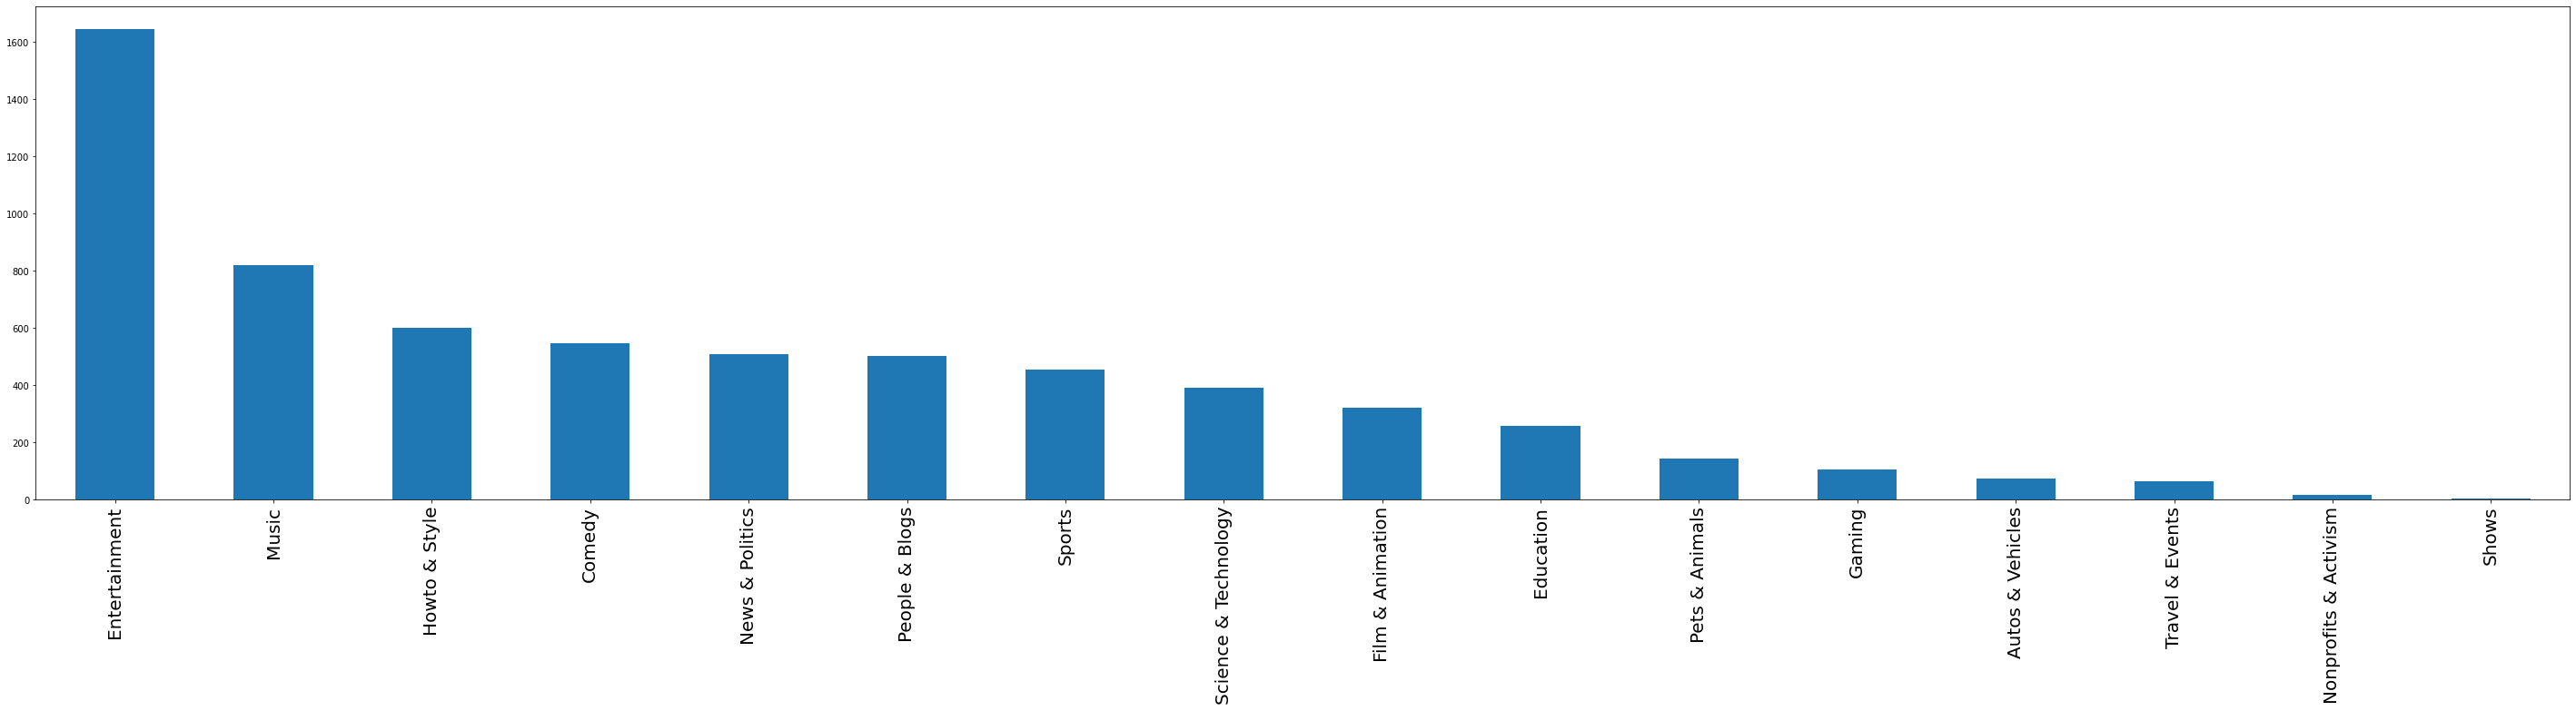

In [ ]:
category_count = df['category'].value_counts() # frequency for each category
ax = category_count.plot.bar()
ax.set_xticklabels(labels=category_count.index, fontsize=20)
#plt.figure(figsize=(100,100))
rcParams['figure.figsize'] = 50,10
plt.show()

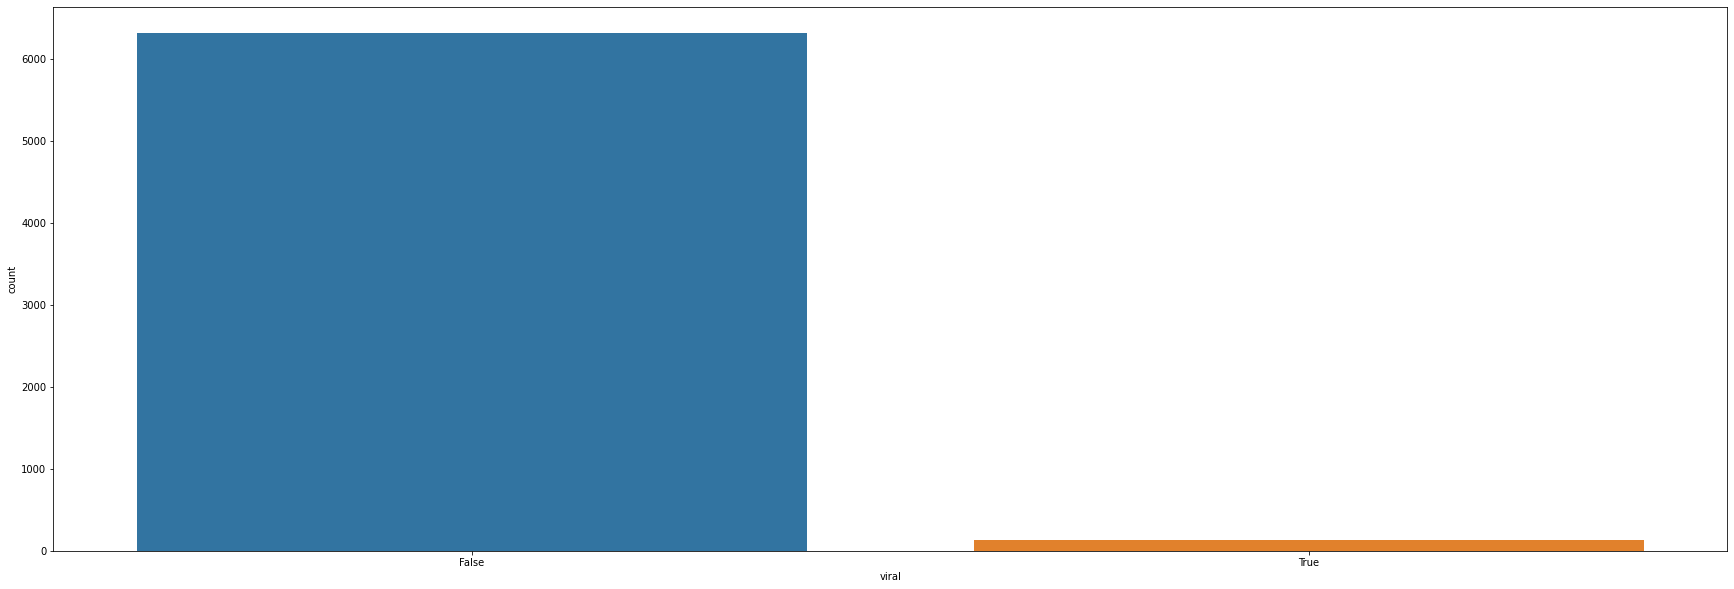

In [ ]:
sns.countplot(x=df['viral']) # count plot reflecting on the number of videos which went viral
rcParams['figure.figsize'] = 20,10
plt.show()

In [ ]:
#go through matplotlib and see what plots are available

In [ ]:
#vdf = df[df['viral']==True]

In [ ]:
#vdf.sort_values(['views','trending_date'], ascending=[False,False]).head(20)

,video_id,trending_date,title,channel_title,category,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trend,viral
5935,FlsCjmMhFmw,2017-12-13,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",7,True
5699,FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",6,True
5452,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113874632,2811215,1470383,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",5,True
5236,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656659,1353647,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4,True
34420,VYOjWnS4cMY,2018-05-13,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06,10,04:00:07,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",98938809,3037293,161812,319502,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,7,True
36816,7C2z4GqqS5E,2018-05-25,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18,10,09:00:02,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",92054928,5232318,179451,1163977,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,7,True
4514,6ZfuNTqbHE8,2017-12-06,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29,24,13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87449453,2584672,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,7,True
36611,7C2z4GqqS5E,2018-05-24,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18,10,09:00:02,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",87430865,5150831,172570,1142269,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,6,True
34202,VYOjWnS4cMY,2018-05-12,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06,10,04:00:07,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",85092067,2735961,140711,289682,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,6,True
4276,6ZfuNTqbHE8,2017-12-05,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29,24,13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",84281319,2555411,51008,339708,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,6,True


In [ ]:
def visualize_most(df, column, num=10): # getting the top 10 videos by default
    sorted_df = df.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df[column].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df['category']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, fontsize=10) 
    fig = plt.gcf()
    fig.set_size_inches(20,8)
    plt.show()
    

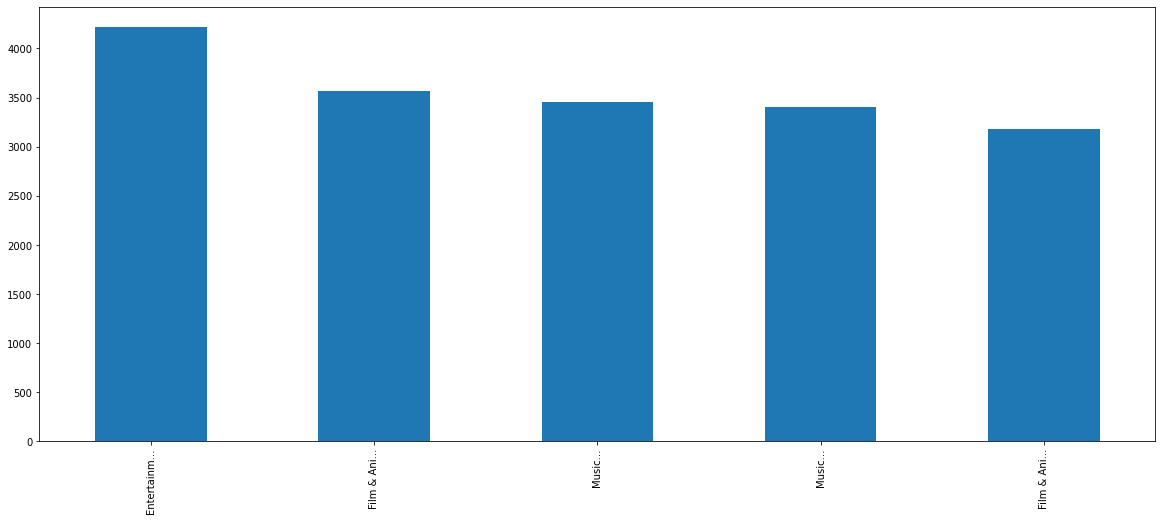

In [ ]:
visualize_most(df, 'trend', 5)


In [ ]:
def visualize_statistics(my_df, id_list): # taking a list of video ids
    target_df = my_df.loc[id_list]
    
    ax = target_df[['views', 'likes', 'dislikes', 'comment_count']].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in target_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=20)
    rcParams['figure.figsize'] = 50,20
    
    plt.show()

In [ ]:
sample_id_list = df.sample(n=25, random_state=4).index # creates a random sample of 10 video IDs
sample_id_list

Int64Index([34744, 28138,  4396, 14598,  4981, 19571, 16555,  7389, 20739,
             5446,  8001,  6765, 24530, 18363, 29118, 18132, 34691,  2398,
            30348, 16847,  3296,  1587, 38746, 11354, 28817],
           dtype='int64')

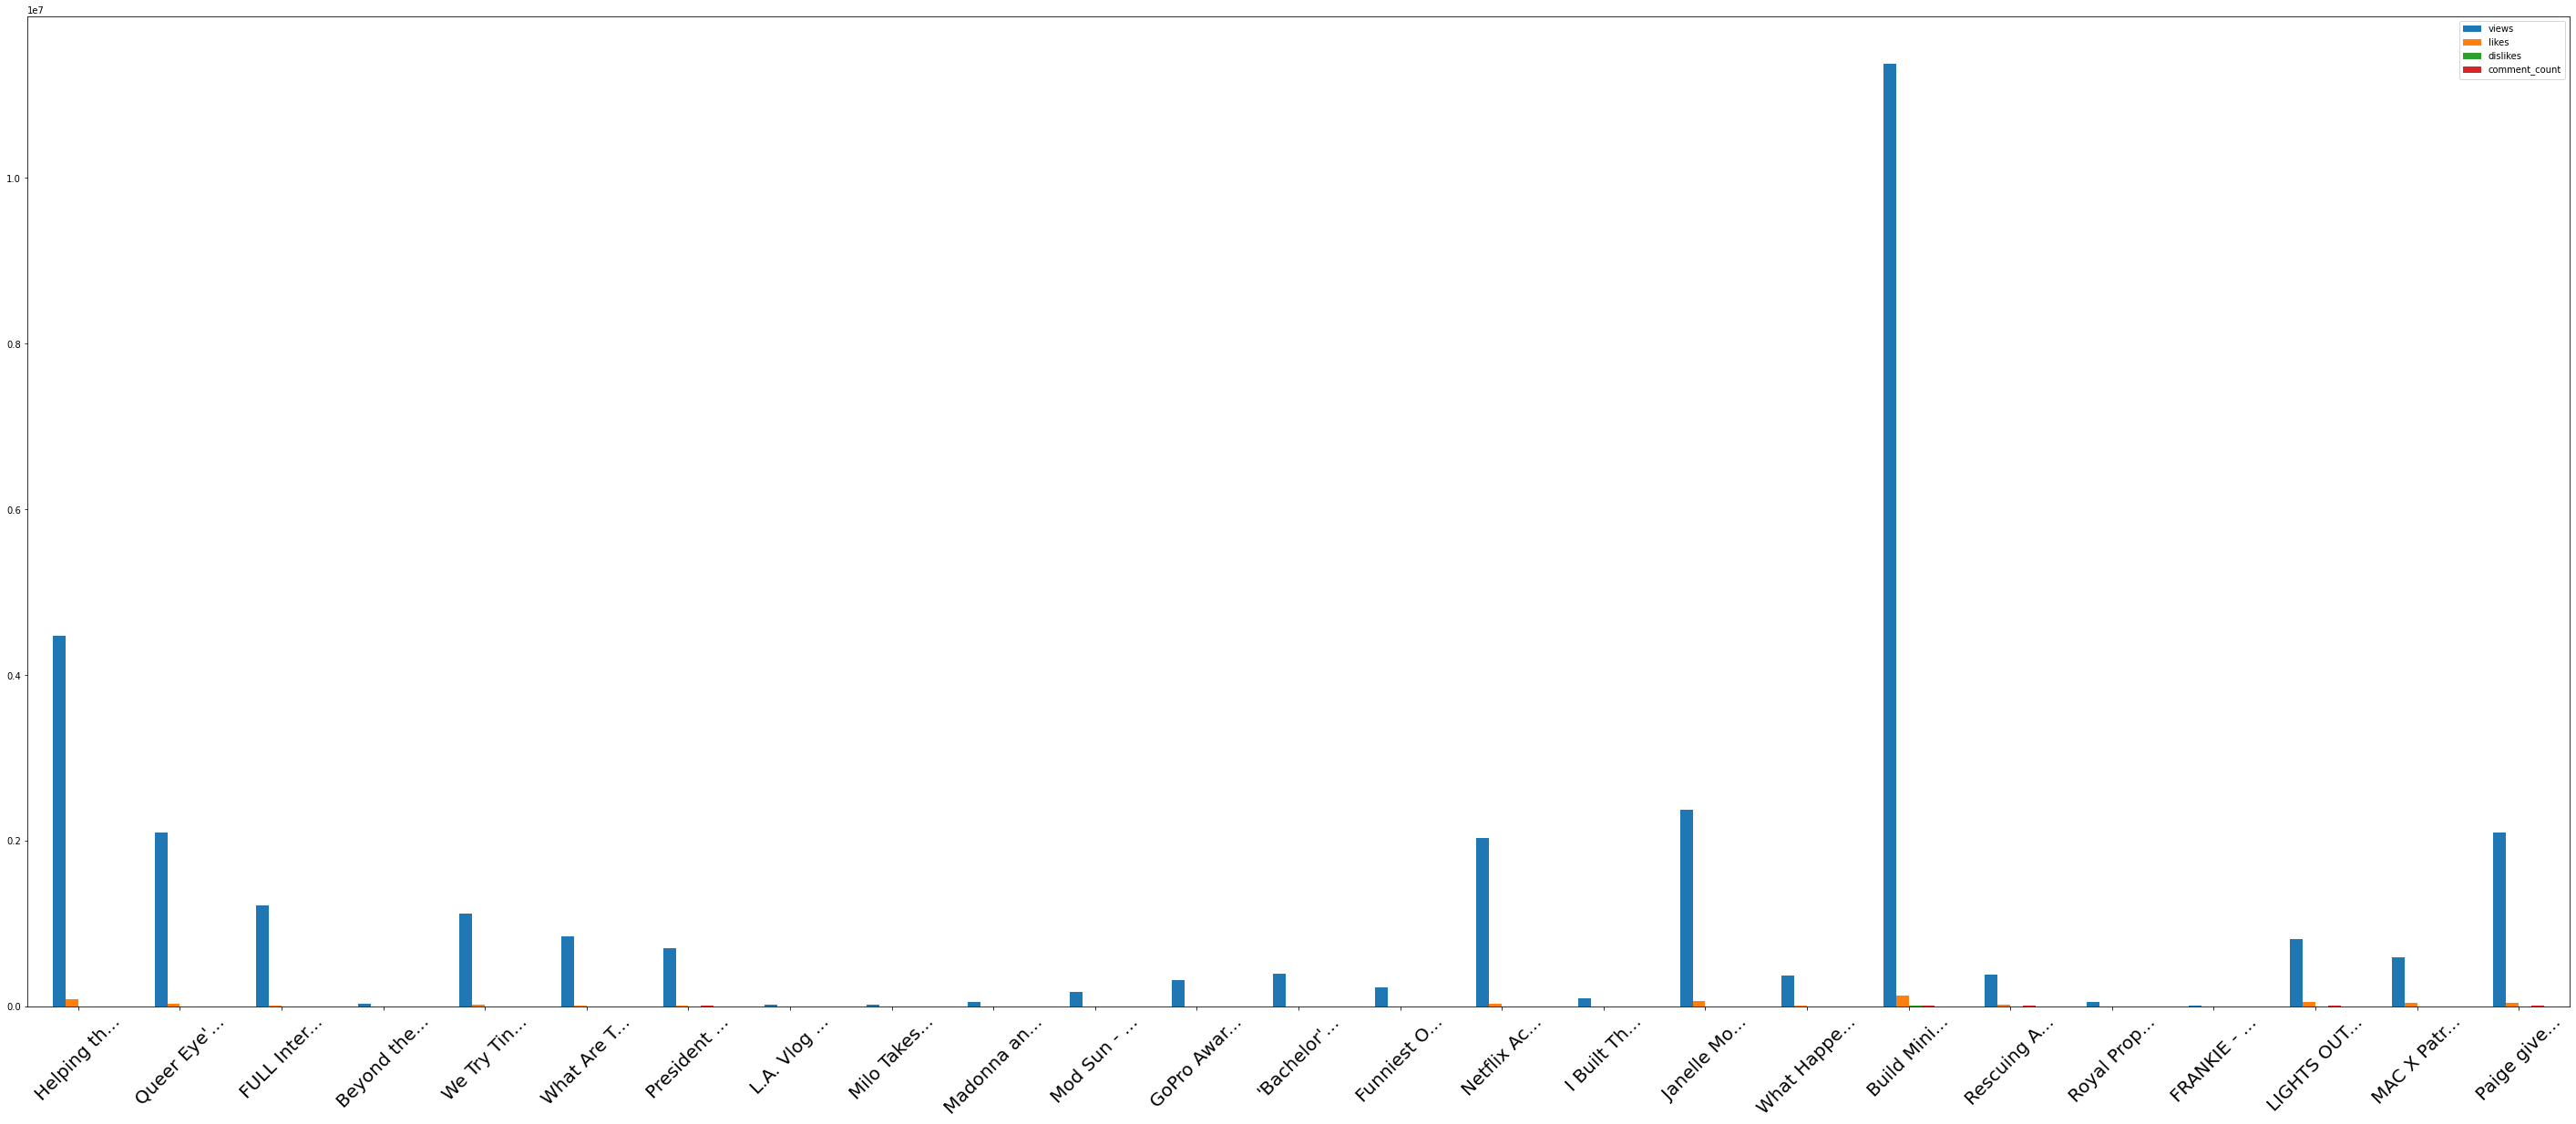

In [ ]:
visualize_statistics(df, sample_id_list)

In [ ]:
df[df['dislikes']>1000]

,video_id,trending_date,title,channel_title,category,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trend,viral
44,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,People & Blogs,2017-11-11,22,15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,3,False
104,pz95u3UVpaM,2017-11-14,Camila Cabello - Havana (Vertical Video) ft. Y...,CamilaCabelloVEVO,Music,2017-11-10,10,05:01:00,"camila cabello|""camila""|""young thug""|""havana""|...",5476737,286268,4083,12254,https://i.ytimg.com/vi/pz95u3UVpaM/default.jpg,False,False,False,Havana – Spotify Vertical Video \nVideo Direct...,4,True
148,44NYFvhXmW8,2017-11-14,Thirty Seconds To Mars - Walk On Water (Offici...,ThirtySecondsToMarsVEVO,Music,2017-11-08,10,13:00:00,"Thirty|""Seconds""|""To""|""Mars""|""Walk""|""On""|""Wate...",1905487,65854,2442,4490,https://i.ytimg.com/vi/44NYFvhXmW8/default.jpg,False,False,False,Best of Thirty Seconds To Mars: https://goo.gl...,6,False
149,9wg3v-01yKQ,2017-11-14,Harry Styles - Kiwi,HarryStylesVEVO,Music,2017-11-08,10,13:00:01,"Columbia|""Harry Styles""|""Kiwi""|""Pop""",9632678,810895,16139,59473,https://i.ytimg.com/vi/9wg3v-01yKQ/default.jpg,False,False,False,Harry Styles' self-titled debut album is avail...,6,True
172,egXr0PU-kCY,2017-11-14,BEAUTY GURU GETS A MAKEOVER... FINALE,James Charles,Entertainment,2017-11-08,24,22:17:37,"james|""james charles""|""charles""|""makeup""|""mua""...",1073134,47793,1886,5358,https://i.ytimg.com/vi/egXr0PU-kCY/default.jpg,False,False,False,HI SISTERS! Welcome back to the final episode ...,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40943,1PhPYr_9zRY,2018-06-14,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,People & Blogs,2018-05-18,22,16:39:29,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",27,False
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,2018-05-18,15,13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,27,False
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,2018-05-18,24,17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,27,False
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,Film & Animation,2018-05-17,1,17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,28,False


In [ ]:
df.sort_values('dislikes', ascending = False)

,video_id,trending_date,title,channel_title,category,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trend,viral
11323,QwZT7T-TXT0,2018-01-09,So Sorry.,Logan Paul Vlogs,Entertainment,2018-01-02,24,16:42:21,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN,7,True
6181,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",8,False
15571,oWjxSkJpxFU,2018-02-01,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24,29,18:30:01,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",24286474,1988746,497847,658130,https://i.ytimg.com/vi/oWjxSkJpxFU/default.jpg,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,8,False
38547,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06,10,04:00:07,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,27,False
17063,_5d-sQ7Fh5M,2018-02-09,LOGAN PAUL IS BACK!,Logan Paul Vlogs,Entertainment,2018-02-04,24,22:02:27,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",14161833,1216340,291900,436698,https://i.ytimg.com/vi/_5d-sQ7Fh5M/default.jpg,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14172,l0rAEPJoWeE,2018-01-25,JST Connector Crimp,iotexpert,Science & Technology,2018-01-18,28,16:54:50,jst iotexpert iot crimping,3467,17,0,0,https://i.ytimg.com/vi/l0rAEPJoWeE/default.jpg,False,False,False,This is a demonstration video of crimping the ...,7,False
19168,LR2edIotyE8,2018-02-19,Did Beyonce Have To Check An Actress Talking T...,TV One,Entertainment,2018-02-09,24,23:29:30,"TV One|""Radio One""|""Interactive One""|""Beyonce""...",202879,0,0,194,https://i.ytimg.com/vi/LR2edIotyE8/default.jpg,False,True,False,Only Tiffany Haddish can say she had THIS kind...,10,False
16214,4HSul1NBFes,2018-02-05,Trader Green Room: All Evening Long,TDAmeritrade,Education,2018-02-04,27,23:54:08,"Financial advisor|""financial goals""|""financial...",3831,0,0,0,https://i.ytimg.com/vi/4HSul1NBFes/default.jpg,True,True,False,"Thanks to 24-5 trading at TD Ameritrade, you c...",1,False
6775,acVAwLTe3lM,2017-12-17,Meet Emily #MAKEYOURMARK | Missguided,Missguided,Howto & Style,2017-12-12,26,10:26:33,"missguided|""Missguided""",4371,18,0,0,https://i.ytimg.com/vi/acVAwLTe3lM/default.jpg,False,False,False,"Meet Emily Bador, model, feminist and body con...",5,False


In [ ]:
def visualize_like_dislike(my_df, id_list):
    target_df = my_df.loc[id_list]
    
    ax = target_df[['likes', 'dislikes']].plot.bar(stacked=True)
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in target_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

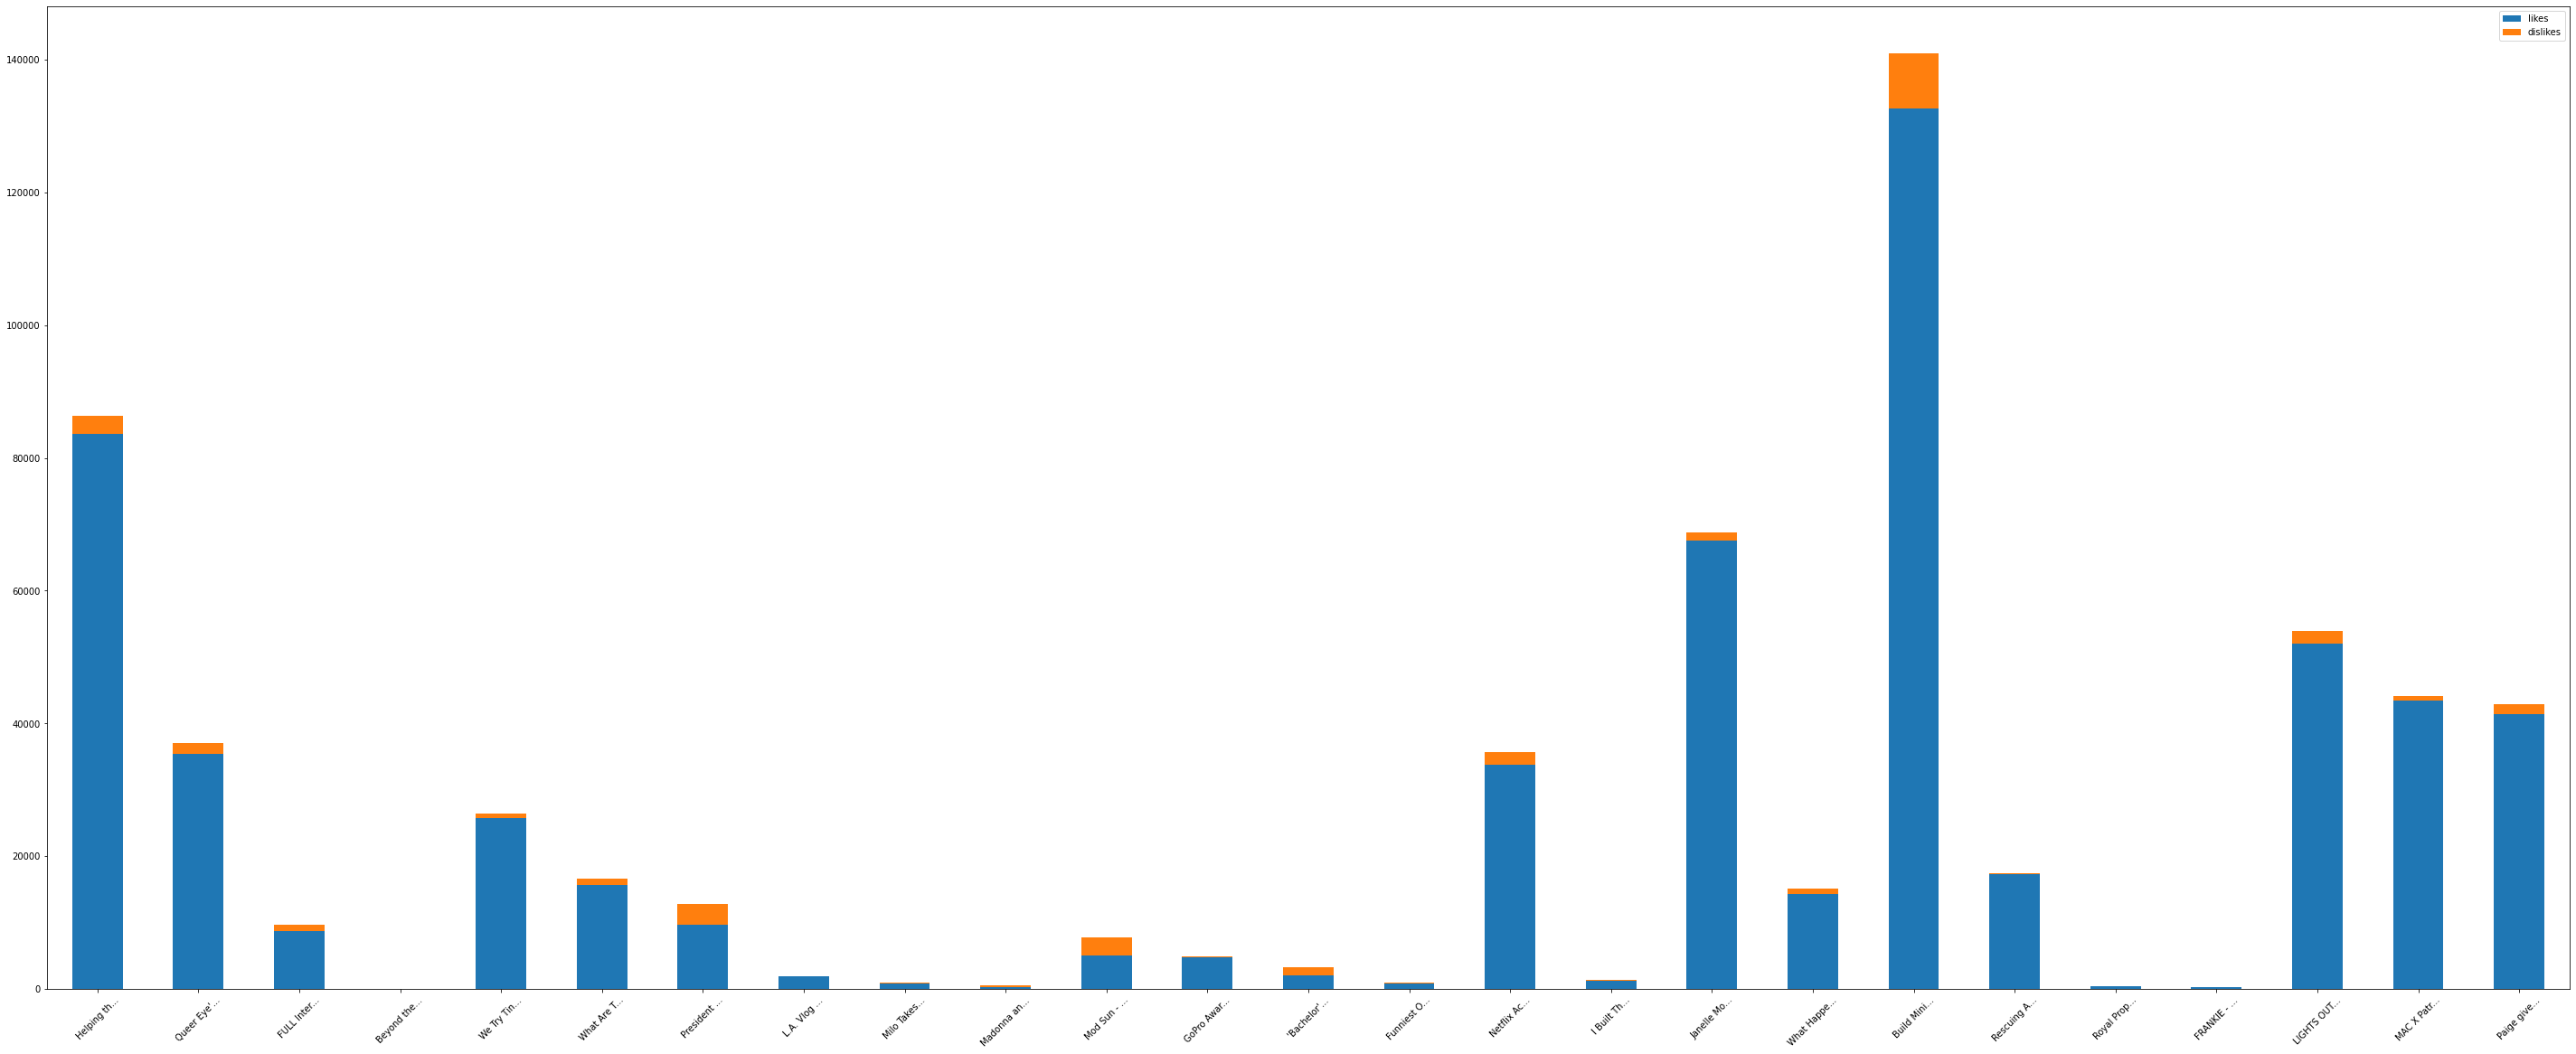

In [ ]:
visualize_like_dislike(df, sample_id_list)

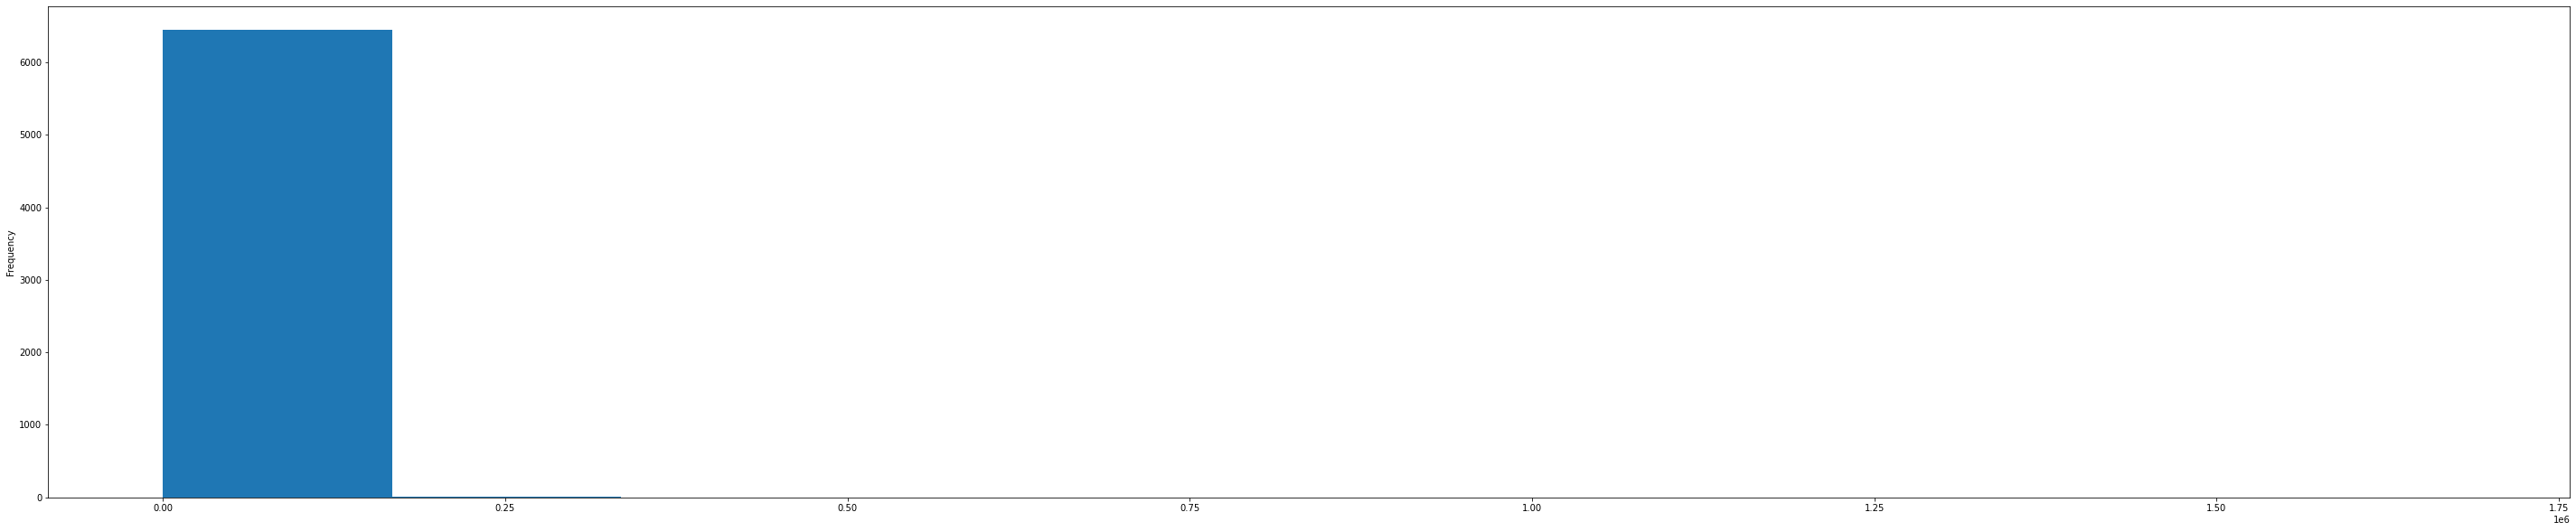

In [ ]:
df['dislikes'].plot.hist()
rcParams['figure.figsize'] = 50,10
plt.show()

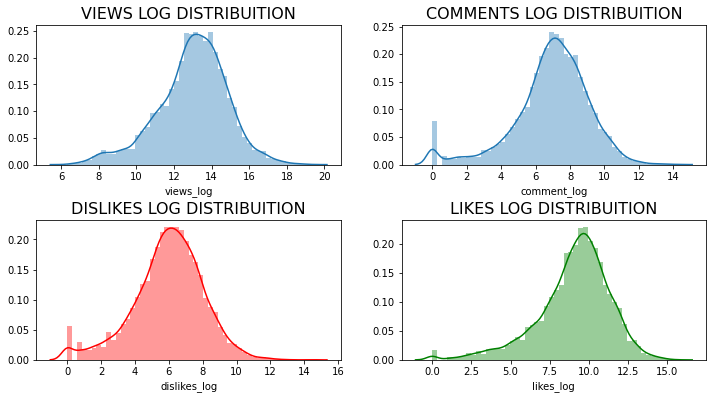

In [ ]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)



plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [ ]:
X = df[['likes','views','dislikes','comment_count']]
m1=df['viral'].astype(int)
y = pd.DataFrame(df['viral'])
df['inviral'] = df['viral'].astype(int)

y.shape

(6455, 1)

In [ ]:
dfcm = df[['views','likes','dislikes','comment_count','viral']]
corr= dfcm.corr()
corr

,views,likes,dislikes,comment_count,viral
views,1.000000,0.834151,0.442036,0.573893,0.186412
likes,0.834151,1.000000,0.421040,0.765772,0.237119
dislikes,0.442036,0.421040,1.000000,0.734974,0.116220
comment_count,0.573893,0.765772,0.734974,1.000000,0.186507
viral,0.186412,0.237119,0.116220,0.186507,1.000000


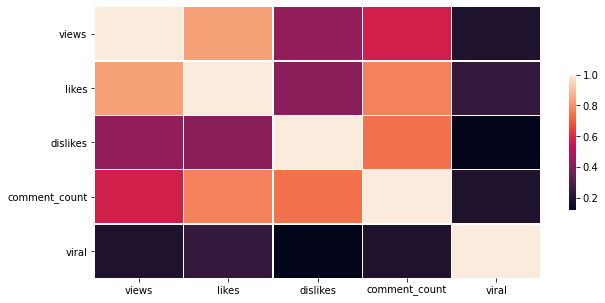

In [ ]:
rcParams['figure.figsize'] = 10,5
sns.heatmap(corr,  linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#Splitting out data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3)
print(y_train.shape)
print(y_test.shape)
y.shape

(4518, 1)
(1937, 1)


(6455, 1)

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.604288
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: -5.020   
Dependent Variable: viral            AIC:              7809.3556
Date:               2020-07-10 21:21 BIC:              7836.4461
No. Observations:   6455             Log-Likelihood:   -3900.7  
Df Model:           3                LL-Null:          -647.96  
Df Residuals:       6451             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
likes            0.0000   0.0000   4.3469 0.0000  0.0000  0.0000
views           -0.0000   0.0000 -17.7344 0.0000 -0.0000 -0.0000
dislikes     

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print (logreg.score(X_train, y_train))

0.9760956175298805


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1895    8]
 [  34    0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1903
        True       0.00      0.00      0.00        34

    accuracy                           0.98      1937
   macro avg       0.49      0.50      0.49      1937
weighted avg       0.97      0.98      0.97      1937



In [ ]:
#ROC Curve
